In [109]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import csv
from scipy.stats import zscore

In [39]:
df = pd.read_csv('menu.csv', delimiter=',')
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [116]:
# Pembersihan Data pada kolom Serving Size
x = []
for i in df['Serving Size']:
    # 236 ml == 7.98 oz
    if i == '1 carton (236 ml)':
        x.append(float(7.98))
    # 33g == 0.035 oz
    elif i == '1 cookie (33 g)':
        x.append(float(0.035))
    else:
        x.append(float(i.split(' ')[0]))
dfg['Serving Size'] = x
dfg.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8,300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8,250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9,370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7,450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7,400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


Soal No 1

In [129]:
#### No1 

#dfinfo = df.describe()
dfginfo = dfg.describe()


mean_ServingSize = dfginfo.iloc[1,0]
mean_Calories = dfinfo.iloc[1,0]
mean_TotalFat = dfinfo.iloc[1,2]

std_ServingSize = dfginfo.iloc[2,0]
std_Calories = dfinfo.iloc[2,0]
std_TotalFat = dfinfo.iloc[2,2]

min_ServingSize = dfginfo.iloc[3,0]
min_Calories = dfinfo.iloc[3,0]
min_TotalFat = dfinfo.iloc[3,2]

q1_ServingSize = dfginfo.iloc[4,0]
q1_Calories = dfinfo.iloc[4,0]
q1_TotalFat = dfinfo.iloc[4,2]


median_ServingSize = dfginfo.iloc[5,0]
median_Calories = dfinfo.iloc[5,0]
median_TotalFat = dfinfo.iloc[5,2]

q3_ServingSize = dfginfo.iloc[6,0]
q3_Calories = dfinfo.iloc[6,0]
q3_TotalFat = dfinfo.iloc[6,2]

max_ServingSize = dfginfo.iloc[7,0]
max_Calories = dfinfo.iloc[7,0]
max_TotalFat = dfinfo.iloc[7,2]

range_ServingSize = max_ServingSize - min_ServingSize
range_Calories = max_Calories - min_Calories
range_TotalFat = max_TotalFat - min_TotalFat

var_ServingSize = std_ServingSize**2
var_Calories = std_Calories**2
var_TotalFat = std_TotalFat**2

iqr_ServingSize = q3_ServingSize - q1_ServingSize
iqr_Calories = q3_Calories - q1_Calories
iqr_TotalFat = q3_TotalFat - q1_TotalFat


In [133]:
#### No1 "Cari Mode"
modus = dfg.mode()
mode_ServingSize = modus.iloc[0,2]
mode_Calories = modus.iloc[0,3]
mode_TotalFat = modus.iloc[0,5]

In [134]:
### No1 "jawaban"
print("mean Serving Size adalah", mean_ServingSize)
print("mean Calories adalah", mean_Calories)
print("mean Total Fat adalah", mean_TotalFat)

print("median Serving Size adalah", median_ServingSize)
print("median Calories adalah", median_Calories)
print("median Total Fat adalah", median_TotalFat)

print("mode Serving Size adalah", mode_ServingSize)
print("mode Calories adalah", mode_Calories)
print("mode Total Fat adalah", mode_TotalFat)

print("range Serving Size adalah", range_ServingSize)
print("range Calories adalah", range_Calories)
print("range Total Fat adalah", range_TotalFat)

print("Q1 Serving Size adalah", q1_ServingSize)
print("Q1 Calories adalah", q1_Calories)
print("Q1 Total Fat adalah", q1_TotalFat)

print("Q3 Serving Size adalah", q3_ServingSize)
print("Q3 Calories adalah", q3_Calories)
print("Q3 Total Fat adalah", q3_TotalFat)

print("IQR Serving Size adalah", iqr_ServingSize)
print("IQR Calories adalah", iqr_Calories)
print("IQR Total Fat adalah", iqr_TotalFat)

print("Standar Deviasi Serving Size adalah", std_ServingSize)
print("Standar Deviasi Calories adalah", std_Calories)
print("Standar Deviasi Total Fat adalah", std_TotalFat)

print("Variance Serving Size adalah", var_ServingSize)
print("Variance Calories adalah", var_Calories)
print("Variance Total Fat adalah", var_TotalFat)

mean Serving Size adalah 12.849346153846154
mean Calories adalah 368.2692307692308
mean Total Fat adalah 14.165384615384616
median Serving Size adalah 12.0
median Calories adalah 340.0
median Total Fat adalah 11.0
mode Serving Size adalah 16.0
mode Calories adalah 0.0
mode Total Fat adalah 0.0
range Serving Size adalah 31.965
range Calories adalah 1880.0
range Total Fat adalah 118.0
Q1 Serving Size adalah 6.975
Q1 Calories adalah 210.0
Q1 Total Fat adalah 2.375
Q3 Serving Size adalah 16.0
Q3 Calories adalah 500.0
Q3 Total Fat adalah 22.25
IQR Serving Size adalah 9.025
IQR Calories adalah 290.0
IQR Total Fat adalah 19.875
Standar Deviasi Serving Size adalah 7.00360694132639
Standar Deviasi Calories adalah 240.26988649145852
Standar Deviasi Total Fat adalah 14.205998034646498
Variance Serving Size adalah 49.05051018859519
Variance Calories adalah 57729.61835461836
Variance Total Fat adalah 201.81038016038016


Soal 1 "Bagian Z-Score tiap poin

In [143]:
# Menghitung Z-Score pada tiap data point
for a in dfg[['Serving Size','Calories','Total Fat']]:
    col_zscore = a + '_zscore'
    dfg[col_zscore] = (dfg[a] - dfg[a].mean())/dfg[a].std(ddof=0)
dfg[dfg.columns[24:]]


,Serving Size Outlier Check,Calories Outlier Check,Total Fat Outlier Check,Serving Size_zscore,Calories_zscore,Total Fat_zscore
0,True,True,True,-1.151531,-0.284684,-0.082193
1,True,True,True,-1.151531,-0.493184,-0.434836
2,True,True,True,-1.280284,0.007217,0.623093
3,True,True,True,-1.022778,0.340818,0.975736
4,True,True,True,-1.022778,0.132318,0.623093
...,...,...,...,...,...,...
255,True,True,True,-0.393319,0.591019,0.199921
256,True,True,True,0.078776,1.341622,0.623093
257,True,True,True,-0.879719,-0.117883,-0.223250
258,True,True,True,0.193223,1.842023,1.257850


In [136]:
### Soal 2a "Outlier IQR Method"

outlow_ServingSize = q1_Calories - (1.5 * iqr_ServingSize)
outlow_Calories = q1_Calories - (1.5 * iqr_Calories)
outlow_TotalFat = q1_TotalFat - (1.5 * iqr_TotalFat)

outhi_ServingSize = q3_Calories + (1.5 * iqr_ServingSize)
outhi_Calories = q3_Calories + (1.5 * iqr_Calories)
outhi_TotalFat = q3_TotalFat + (1.5 * iqr_TotalFat)

print("Lower Outlier Serving Size adalah", outlow_ServingSize)
print("Lower Outlier Calories adalah", outlow_Calories)
print("Lower Outlier Total Fat adalah", outlow_TotalFat)

print("Higher Outlier Serving Size adalah", outhi_ServingSize)
print("Higher Outlier adalah", outhi_Calories)
print("Higher Outlier Fat adalah", outhi_TotalFat)

Lower Outlier Serving Size adalah 196.4625
Lower Outlier Calories adalah -225.0
Lower Outlier Total Fat adalah -27.4375
Higher Outlier Serving Size adalah 513.5375
Higher Outlier adalah 935.0
Higher Outlier Fat adalah 52.0625


In [137]:
#### Soal 2a, Check outlier menggunakan Boolean True/False
dfg['Serving Size Outlier Check'] = ((dfg['Serving Size'] > outlow_TotalFat) | (dfg['Serving Size'] < outhi_TotalFat))
dfg['Calories Outlier Check'] = ((dfg['Calories'] > outlow_Calories) | (dfg['Calories'] < outhi_Calories))
dfg['Total Fat Outlier Check'] = ((dfg['Total Fat'] > outlow_TotalFat) | (dfg['Total Fat'] < outhi_TotalFat))

dfg

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size Outlier Check,Calories Outlier Check,Total Fat Outlier Check
0,Breakfast,Egg McMuffin,4.8,300,120,13.0,20,5.0,25,0.0,...,17,3,17,10,0,25,15,True,True,True
1,Breakfast,Egg White Delight,4.8,250,70,8.0,12,3.0,15,0.0,...,17,3,18,6,0,25,8,True,True,True
2,Breakfast,Sausage McMuffin,3.9,370,200,23.0,35,8.0,42,0.0,...,17,2,14,8,0,25,10,True,True,True
3,Breakfast,Sausage McMuffin with Egg,5.7,450,250,28.0,43,10.0,52,0.0,...,17,2,21,15,0,30,15,True,True,True
4,Breakfast,Sausage McMuffin with Egg Whites,5.7,400,210,23.0,35,8.0,42,0.0,...,17,2,21,6,0,25,10,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1,510,150,17.0,26,9.0,44,0.5,...,4,64,12,15,0,40,8,True,True,True
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4,690,200,23.0,35,12.0,58,1.0,...,5,85,15,20,0,50,10,True,True,True
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7,340,100,11.0,17,6.0,29,0.0,...,2,43,8,10,0,25,6,True,True,True
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2,810,290,32.0,50,15.0,76,1.0,...,9,103,21,20,0,60,6,True,True,True


In [141]:
### Soal 2a. Removing Outlier using IQR Method
#dff = dfg.copy()
#dff.drop(dff[dff['Calories Outlier Check'] == False].index, inplace=True)
#dff.drop(dff[dff['Total Fat Outlier Check'] == False].index, inplace=True)
#dff.drop(dff[dff['Total Fat Outlier Check'] == False].index, inplace=True)

#alhasil jumlah row dari dff tetap menunjukkan angka yang sama, sehingga tidak ada outlier

print("Tidak ada outlier sama sekali")

Tidak ada outlier sama sekali


In [147]:
### Soal 2a "Outlier Z-Score Method"
dfgIQR = dfg[['Serving Size','Calories','Total Fat']].quantile(.75) - dfg[['Serving Size','Calories','Total Fat']].quantile(.25)
lowIQR = dfg[['Serving Size','Calories','Total Fat']].quantile(.25) - (1.5*dfgIQR)

zOutlierSs = dfg[(dfg['Serving Size'] <= -2.5) | (dfg['Serving Size'] >= 2.5)]
zOutlierC = dfg[(dfg['Calories'] <= -2.5) | (dfg['Calories'] >= 2.5)]
zOutlierTF = dfg[(dfg['Total Fat'] <= lowIQR[0]) | (dfg['Total Fat'] >= 2.5)]
zOutlierSs.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            250, 251, 252, 253, 254, 255, 256, 257, 258, 259],
           dtype='int64', length=253)

In [149]:
### SOAL NO 3 "BOXPLOT"
dfg['Category'].unique()

aa = dfg[dfg['Category'] == 'Coffee & Tea']
bb = dfg[dfg['Category'] == 'Breakfast']
cc = dfg[dfg['Category'] == 'Chicken & Fish']
dd = dfg[dfg['Category'] == 'Beef & Pork']
ee = dfg[dfg['Category'] == 'Snacks & Sides']

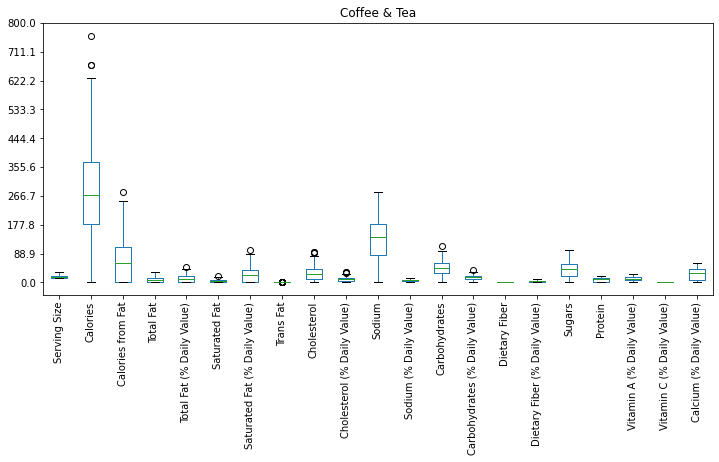

In [151]:
# Boxplot Coffee & Tea
aa[aa.columns[:23]].plot(kind='box',figsize=(12,5))
plt.xticks(rotation=90)
plt.yticks(np.linspace(0,800, num=10))
plt.title('Coffee & Tea')
plt.show()

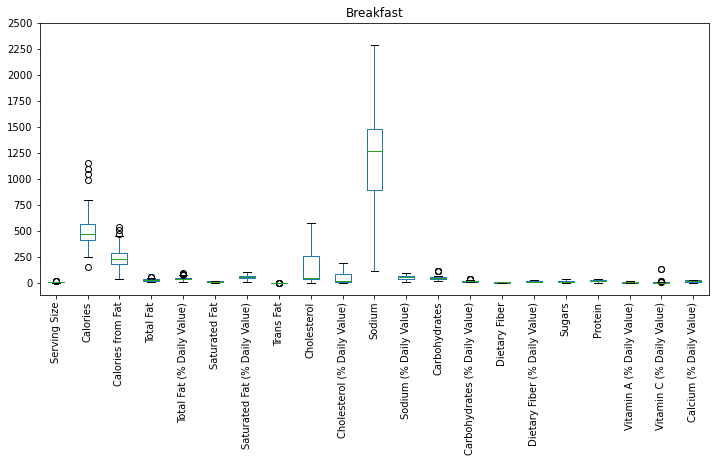

In [152]:
# Boxplot Breakfast
bb[bb.columns[:23]].plot(kind='box',figsize=(12,5))
plt.xticks(rotation=90)
plt.yticks(np.linspace(0,2500, num=11))
plt.title('Breakfast')
plt.show()

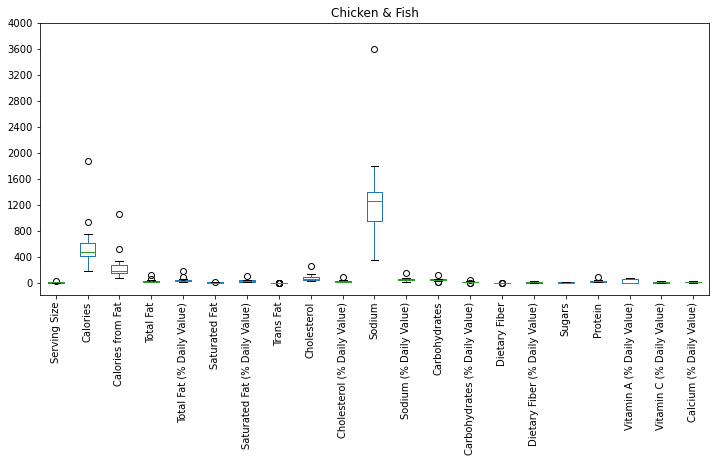

In [153]:
# Boxplot Chicken & Fish
cc[cc.columns[:23]].plot(kind='box',figsize=(12,5))
plt.xticks(rotation=90)
plt.yticks(np.linspace(0,4000, num=11))
plt.title('Chicken & Fish')
plt.show()

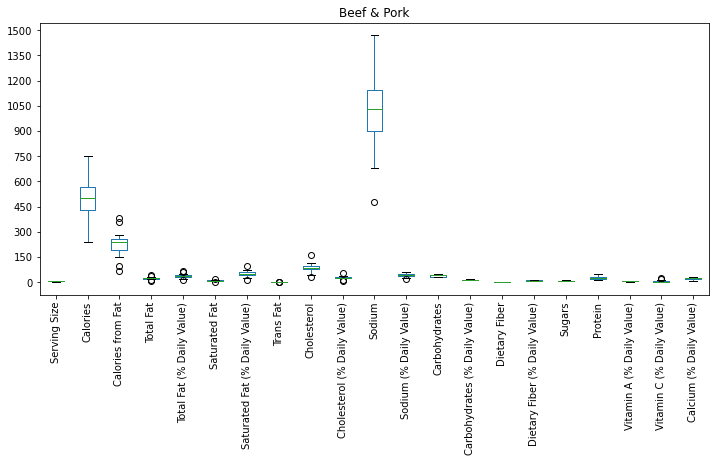

In [154]:
# Boxplot Beef & Pork
dd[dd.columns[:23]].plot(kind='box',figsize=(12,5))
plt.xticks(rotation=90)
plt.yticks(np.linspace(0,1500, num=11))
plt.title('Beef & Pork')
plt.show()

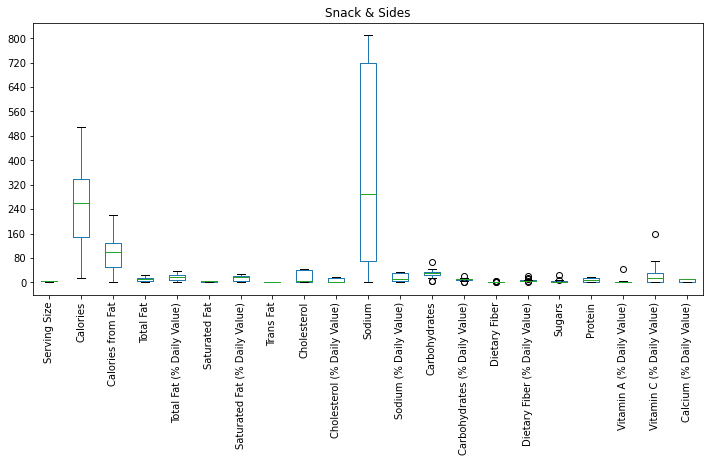

In [155]:
# Boxplot Snacks & Sides
ee[ee.columns[:23]].plot(kind='box',figsize=(12,5))
plt.xticks(rotation=90)
plt.yticks(np.linspace(0,800, num=11))
plt.title('Snack & Sides')
plt.show()

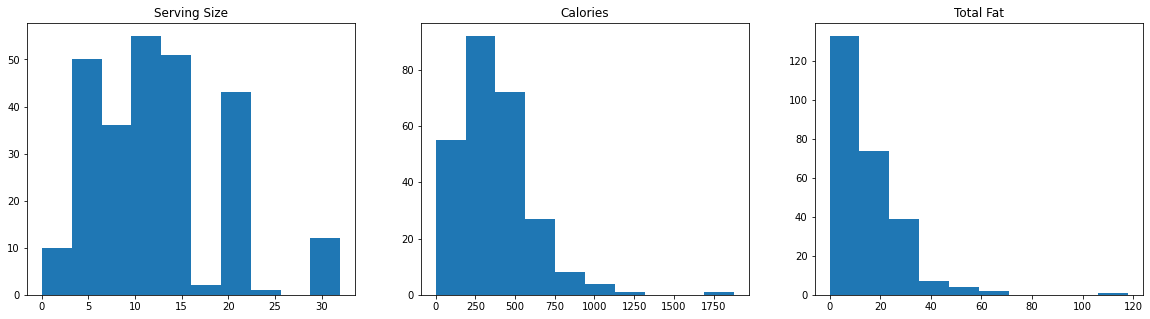

In [156]:
### SOAL NO 3 "HISTOGRAM"
plt.figure(figsize=(20,5))

plt.subplot(131)
plt.hist(dfg['Serving Size'])
plt.title('Serving Size')

plt.subplot(132)
plt.hist(dfg['Calories'])
plt.title('Calories')

plt.subplot(133)
plt.hist(dfg['Total Fat'])
plt.title('Total Fat')

plt.show()

In [159]:
### SOAL NO 4
xyz = dfg[dfg['Category'].isin(['Coffee & Tea','Breakfast','Chicken & Fish','Beef & Pork','Snacks & Sides'])]
#xyz

In [160]:
### TOP 5 
p = xyz.sort_values(by='Serving Size', ascending=False) #Urutkan Serving Size
q = xyz.sort_values(by='Calories', ascending=False) # Urutkan Calories
r = xyz.sort_values(by='Total Fat', ascending=False) # Urutkan Total Fat


In [172]:
####### SERVING SIZE ########
pp = pd.DataFrame()
for i in p['Category'].unique():
    pp = pp.append(p[p['Category'] == i][:5])
pp.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size Outlier Check,Calories Outlier Check,Total Fat Outlier Check,Serving Size_zscore,Calories_zscore,Total Fat_zscore
201,Coffee & Tea,Caramel Iced Coffee (Large),32.0,260,80,9.0,14,6.0,29,0.0,...,6,0,6,0,True,True,True,2.739672,-0.451484,-0.364307
210,Coffee & Tea,Iced Coffee with Sugar Free French Vanilla Syr...,32.0,160,80,9.0,14,6.0,29,0.0,...,6,0,8,0,True,True,True,2.739672,-0.868485,-0.364307
198,Coffee & Tea,Regular Iced Coffee (Large),32.0,270,80,9.0,14,6.0,29,0.0,...,6,0,8,0,True,True,True,2.739672,-0.409784,-0.364307
204,Coffee & Tea,Hazelnut Iced Coffee (Large),32.0,250,80,9.0,14,6.0,29,0.0,...,6,0,8,0,True,True,True,2.739672,-0.493184,-0.364307
207,Coffee & Tea,French Vanilla Iced Coffee (Large),32.0,240,80,9.0,14,6.0,29,0.0,...,6,0,8,0,True,True,True,2.739672,-0.534884,-0.364307


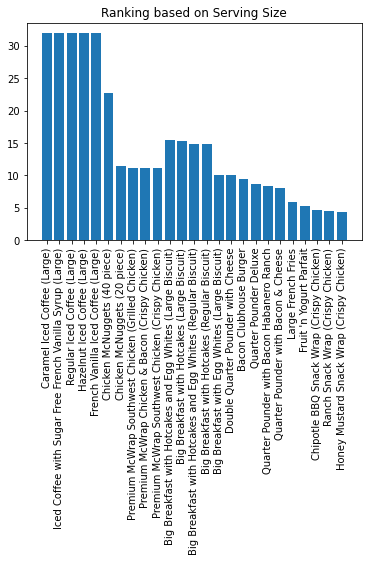

In [173]:
### Serving Size Ranking
plt.bar(pp['Item'], pp['Serving Size'])
plt.xticks(rotation=90)
plt.title('Ranking based on Serving Size')
plt.show()

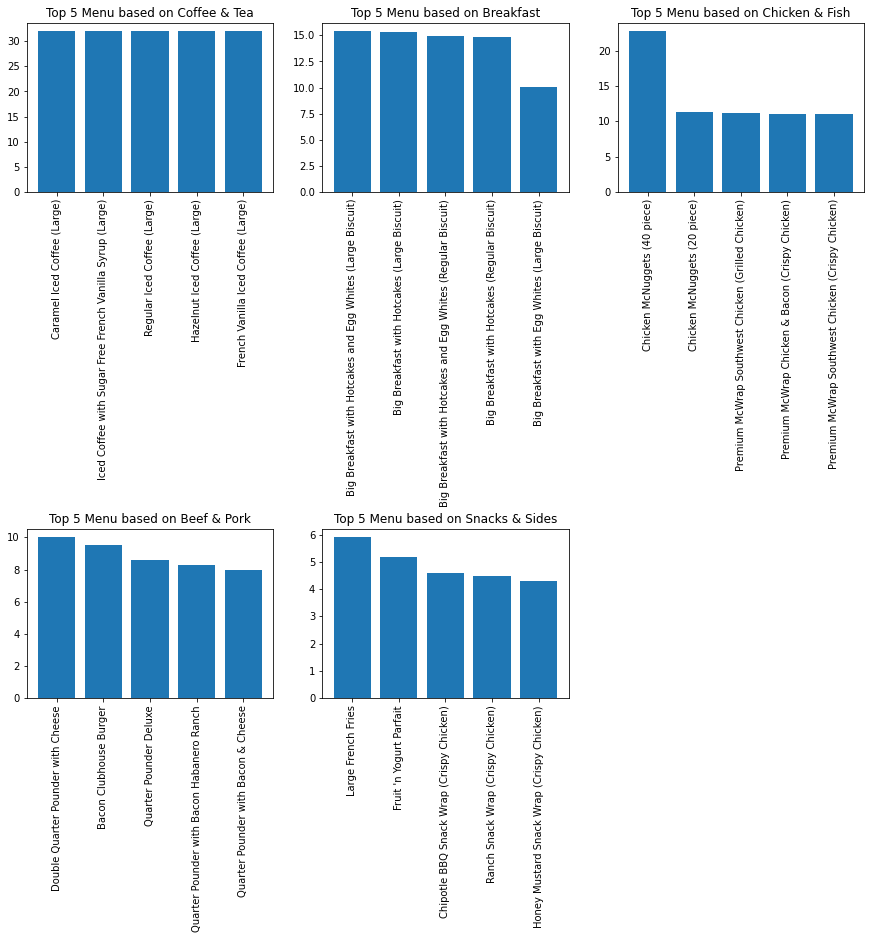

In [171]:
### Serving Size per category
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=2, top=2)
plt.subplot(231)
plt.bar(pp[pp['Category'] == 'Coffee & Tea']['Item'], pp[pp['Category'] == 'Coffee & Tea']['Serving Size'])
plt.xticks(rotation=90)
plt.title('Top 5 Menu based on Coffee & Tea')

plt.subplot(232)
plt.bar(pp[pp['Category'] == 'Breakfast']['Item'], pp[pp['Category'] == 'Breakfast']['Serving Size'])
plt.xticks(rotation=90)
plt.title('Top 5 Menu based on Breakfast')

plt.subplot(233)
plt.bar(pp[pp['Category'] == 'Chicken & Fish']['Item'], pp[pp['Category'] == 'Chicken & Fish']['Serving Size'])
plt.xticks(rotation=90)
plt.title('Top 5 Menu based on Chicken & Fish')

plt.subplot(234)
plt.bar(pp[pp['Category'] == 'Beef & Pork']['Item'], pp[pp['Category'] == 'Beef & Pork']['Serving Size'])
plt.xticks(rotation=90)
plt.title('Top 5 Menu based on Beef & Pork')

plt.subplot(235)
plt.bar(pp[pp['Category'] == 'Snacks & Sides']['Item'], pp[pp['Category'] == 'Snacks & Sides']['Serving Size'])
plt.xticks(rotation=90)
plt.title('Top 5 Menu based on Snacks & Sides')
plt.show()

In [179]:
##### CALORY #####
qq = pd.DataFrame()
for i in q['Category'].unique():
    qq = qq.append(q[q['Category'] == i][:5])
qq.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size Outlier Check,Calories Outlier Check,Total Fat Outlier Check,Serving Size_zscore,Calories_zscore,Total Fat_zscore
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8,1880,1060,118.0,182,20.0,101,1.0,...,0,15,8,25,True,True,True,1.423530,6.303938,7.323306
81,Chicken & Fish,Chicken McNuggets (20 piece),11.4,940,530,59.0,91,10.0,50,0.0,...,0,8,4,10,True,True,True,-0.207342,2.384125,3.162121
63,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,10.0,750,340,38.0,59,10.0,51,0.5,...,8,25,30,15,True,True,True,-0.407624,1.591822,1.681021
74,Chicken & Fish,Premium McWrap Southwest Chicken (Crispy Chicken),11.1,670,300,33.0,51,8.0,40,0.5,...,60,15,20,20,True,True,True,-0.250260,1.258221,1.328378
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,8.8,670,300,33.0,51,9.0,44,0.0,...,8,20,30,20,True,True,True,-0.579295,1.258221,1.328378


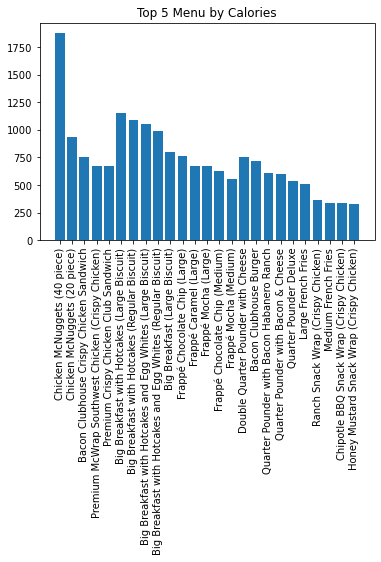

In [181]:
# Calory Ranking
plt.bar(qq['Item'], qq['Calories'])
plt.xticks(rotation=90)
plt.title('Top 5 Menu by Calories')
plt.show()

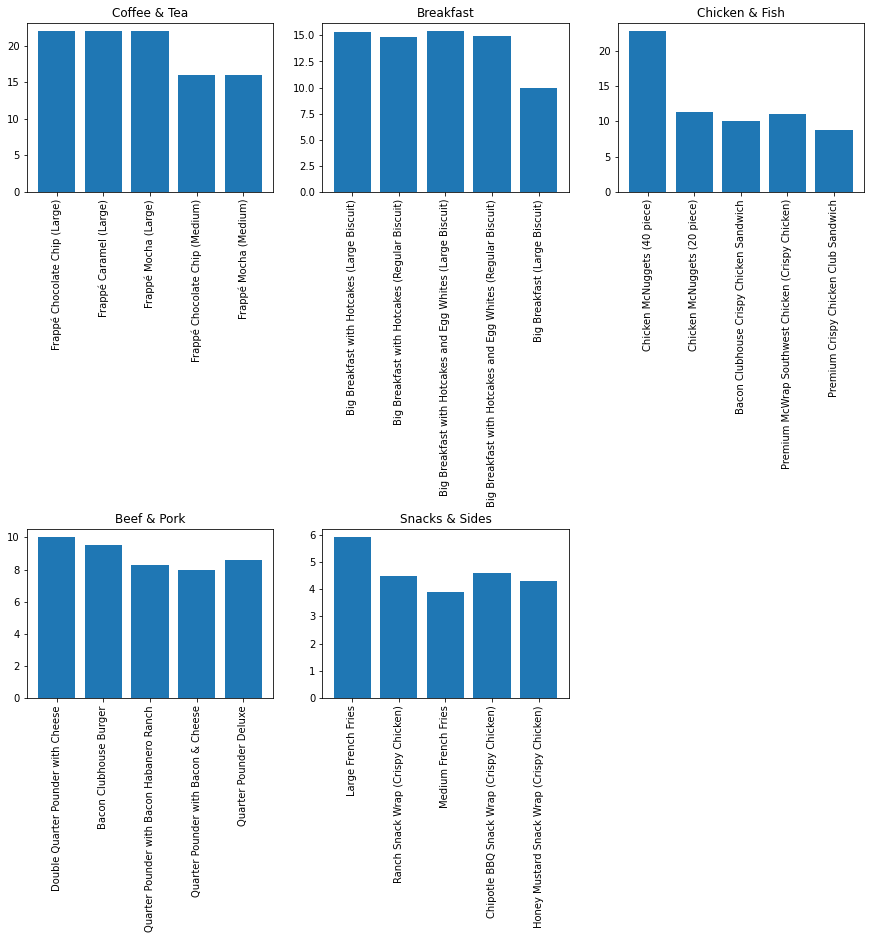

In [182]:
### CALORY per category
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=2, top=2)
plt.subplot(231)
plt.bar(qq[qq['Category'] == 'Coffee & Tea']['Item'], qq[qq['Category'] == 'Coffee & Tea']['Serving Size'])
plt.xticks(rotation=90)
plt.title('Coffee & Tea')

plt.subplot(232)
plt.bar(qq[qq['Category'] == 'Breakfast']['Item'], qq[qq['Category'] == 'Breakfast']['Serving Size'])
plt.xticks(rotation=90)
plt.title('Breakfast')

plt.subplot(233)
plt.bar(qq[qq['Category'] == 'Chicken & Fish']['Item'], qq[qq['Category'] == 'Chicken & Fish']['Serving Size'])
plt.xticks(rotation=90)
plt.title('Chicken & Fish')

plt.subplot(234)
plt.bar(qq[qq['Category'] == 'Beef & Pork']['Item'], qq[qq['Category'] == 'Beef & Pork']['Serving Size'])
plt.xticks(rotation=90)
plt.title('Beef & Pork')

plt.subplot(235)
plt.bar(qq[qq['Category'] == 'Snacks & Sides']['Item'], qq[qq['Category'] == 'Snacks & Sides']['Serving Size'])
plt.xticks(rotation=90)
plt.title('Snacks & Sides')
plt.show()

In [183]:
#### TOTAL FAT #####
rr = pd.DataFrame()
for i in r['Category'].unique():
    rr = rr.append(r[r['Category'] == i][:5])
rr.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size Outlier Check,Calories Outlier Check,Total Fat Outlier Check,Serving Size_zscore,Calories_zscore,Total Fat_zscore
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8,1880,1060,118.0,182,20.0,101,1.0,...,0,15,8,25,True,True,True,1.423530,6.303938,7.323306
81,Chicken & Fish,Chicken McNuggets (20 piece),11.4,940,530,59.0,91,10.0,50,0.0,...,0,8,4,10,True,True,True,-0.207342,2.384125,3.162121
63,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,10.0,750,340,38.0,59,10.0,51,0.5,...,8,25,30,15,True,True,True,-0.407624,1.591822,1.681021
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,8.8,670,300,33.0,51,9.0,44,0.0,...,8,20,30,20,True,True,True,-0.579295,1.258221,1.328378
74,Chicken & Fish,Premium McWrap Southwest Chicken (Crispy Chicken),11.1,670,300,33.0,51,8.0,40,0.5,...,60,15,20,20,True,True,True,-0.250260,1.258221,1.328378


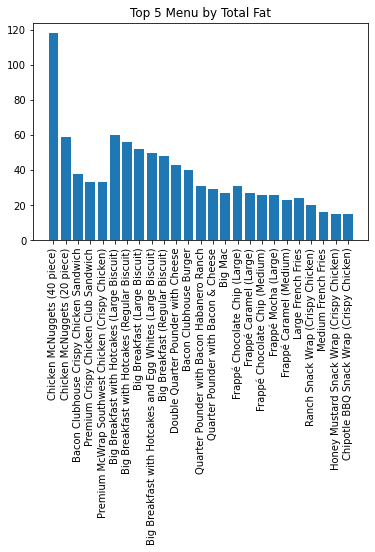

In [184]:
### menu ranking based of Total Fat per category
plt.bar(rr['Item'], rr['Total Fat'])
plt.xticks(rotation=90)
plt.title('Top 5 Menu by Total Fat')
plt.show()

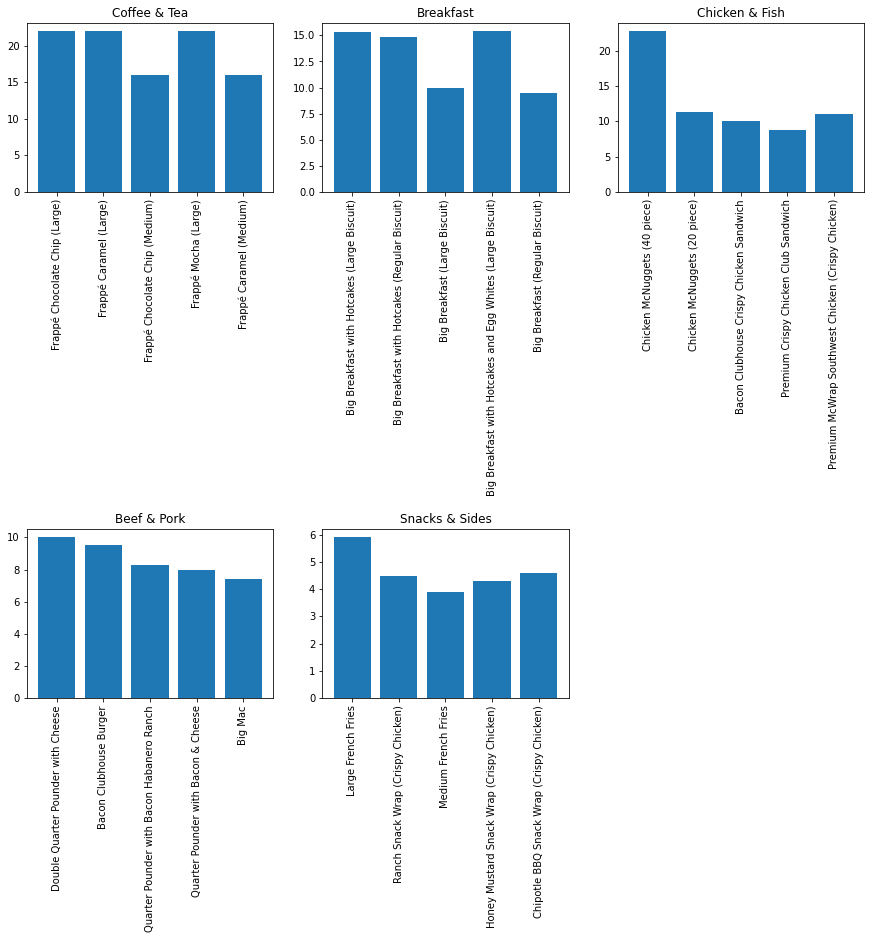

In [185]:
### BASED ON total fat per category
plt.figure(figsize=(15,5))
plt.subplots_adjust(hspace=2, top=2)
plt.subplot(231)
plt.bar(rr[rr['Category'] == 'Coffee & Tea']['Item'], rr[rr['Category'] == 'Coffee & Tea']['Serving Size'])
plt.xticks(rotation=90)
plt.title('Coffee & Tea')

plt.subplot(232)
plt.bar(rr[rr['Category'] == 'Breakfast']['Item'], rr[rr['Category'] == 'Breakfast']['Serving Size'])
plt.xticks(rotation=90)
plt.title('Breakfast')

plt.subplot(233)
plt.bar(rr[rr['Category'] == 'Chicken & Fish']['Item'], rr[rr['Category'] == 'Chicken & Fish']['Serving Size'])
plt.xticks(rotation=90)
plt.title('Chicken & Fish')

plt.subplot(234)
plt.bar(rr[rr['Category'] == 'Beef & Pork']['Item'], rr[rr['Category'] == 'Beef & Pork']['Serving Size'])
plt.xticks(rotation=90)
plt.title('Beef & Pork')

plt.subplot(235)
plt.bar(rr[rr['Category'] == 'Snacks & Sides']['Item'], rr[rr['Category'] == 'Snacks & Sides']['Serving Size'])
plt.xticks(rotation=90)
plt.title('Snacks & Sides')
plt.show()